In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install plotly

In [38]:
## This makes visualisation more interactive

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [7]:
train_data = pd.read_excel('Data_Train.xlsx')

In [10]:
train_data.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


In [11]:
## information of the data (which are Flight Tickets)

train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
## Finding missing values

train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
## This is the shape of the dataframe which has 10683 columns and 11 rows

train_data.shape

(10683, 11)

In [14]:
# locating all the rows where we have missing value [only 1 row indicates a mising values]

train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [15]:
## Removing the missing values and update the dataframe

train_data.dropna(inplace=True)

In [16]:
## The missing values are gone and updated in the dataframe

train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# DATA PRE-PROCESSING 

In [17]:
## Creating a copy of the train_data and storing it in 'data'

data = train_data.copy()

In [18]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [19]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [20]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [21]:
data.columns 

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [22]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

In [23]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Cleaning Date_of_Journey


In [24]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [25]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [26]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [27]:
## I have updated (and cleaned date_of_journey in) the dataframe with extra rows [jorney day, journey month, 
                                                                                             #journey year]
data.head(2) 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-12-18 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-18 05:50:00,2022-12-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [28]:
## after updating the dataframe I removed the Date_of_Journey

data.drop('Date_of_Journey',axis=1,inplace=True)

In [29]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-12-18 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-18 05:50:00,2022-12-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


### Cleaning Dep_Time and Arrival_Time then featurize it 


In [30]:
## This is a fuction which extract hours and minutes

def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [31]:
## The dataframe has been updated with new features [Dep_time_hour and minute]

extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [32]:
## The dataframe has been updated with new features [arrival_time_hour and minute]

extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


# DATA ANALYSIS: analysing when most of the flight takeoff 


In [33]:
### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if ( x> 4) and (x<=8 ):
        return 'Early mrng'
    
    elif ( x>8 ) and (x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and (x<=16 ):
        return 'Noon'
    
    elif ( x>16 ) and (x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'

In [36]:
## This counts the number of flights in departure time which is categorised by early morning, evening, noon.....

data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Early mrng    2880
Evening       2357
Morning       2209
Noon          1731
Night         1040
Late night     465
Name: Dep_Time_hour, dtype: int64

<AxesSubplot:>

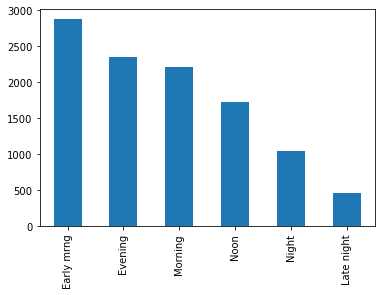

In [42]:
## This is an interactive visualisation of the number of flights in each category

data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

# DATA ANALYSIS: analysis of Airports with the Most no of Departures


In [261]:
## This shows Delhi is the Busiest Airport with 4536 flights followed by Kolkata and Bangalore Airports.

count = train_data.Source.value_counts()
departure = np.array(['Delhi','Kolkata','Bangalore','Mumbai','Chennai'])
count

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

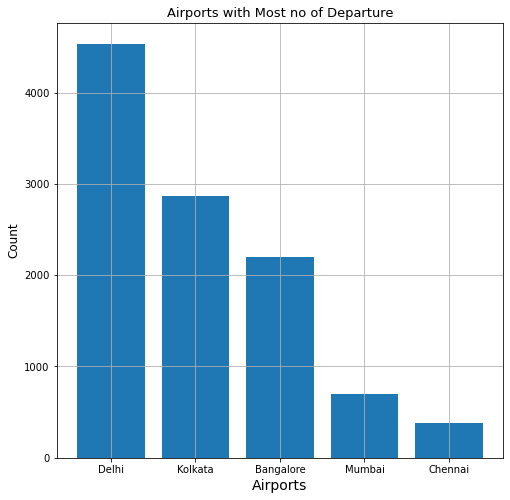

In [257]:
count = train_data.Source.value_counts()
departure = np.array(['Delhi','Kolkata','Bangalore','Mumbai','Chennai'])

fig, ax = plt.subplots()

ax.bar(departure,count)
ax.set_title("Airports with Most no of Departure",fontdict={'size':13})
ax.set_xlabel("Airports",fontdict={'size':14})
ax.set_ylabel("Count",fontdict={'size':12})
ax.grid()

fig.set_size_inches(8,8)
plt.show()

## DATA PRE-PROCESSING: Focusing on duration and extracting new features.


In [48]:
## I am focusing on the duration in this dataframe.

data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [49]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [50]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [51]:
## This shows the duration of each flight.

data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [52]:
data['Duration'][0].split(' ')[0]

'2h'

In [54]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [55]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [56]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [57]:
## The dataframe has been updated with new features [Duration_hours and Duration_min]

data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


# DATA ANALYSIS: analysing if Duration of flights affects price or not.


In [59]:
## This shows the total duration of each flight (array '0' shows 170 minutes...etc), using the 'eval' function

data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [60]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [61]:
## This dataframe is updated and shows the a new feature [Duration_Total_Time] 

data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


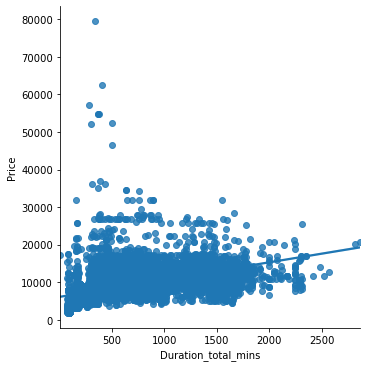

In [62]:
## This is a visualisation, It Plot data and regression model fits across a FacetGrid
## It also shows that As the duration of minutes increases Flight price also increases.

sns.lmplot(x='Duration_total_mins',y='Price',data=data)

## DATA ANALYSIS: Identifying which city has the maximum final destination of flights.


In [64]:
## This shows all the unique destination 

data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [65]:
## This shows/counts the max number of flight in each destination

data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:ylabel='Destination'>

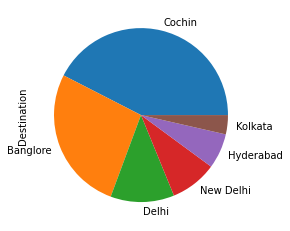

In [66]:
## This is a visualisation in pie chart showing each destination with a different colour...

data['Destination'].value_counts().plot(kind='pie')

## DATA ANALYSIS: Identifying which Route 'Jet Airways' uses the most. (Jet Airways is an airline)


In [70]:
## This shows all the unique Airlines in the data.

data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [71]:
## This shows all the Route in the data.

data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [72]:
## This shows the Frequently used routes by 'Jet Airways' 

data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

# DATA ANALYSIS: Comparing Airline and Price 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

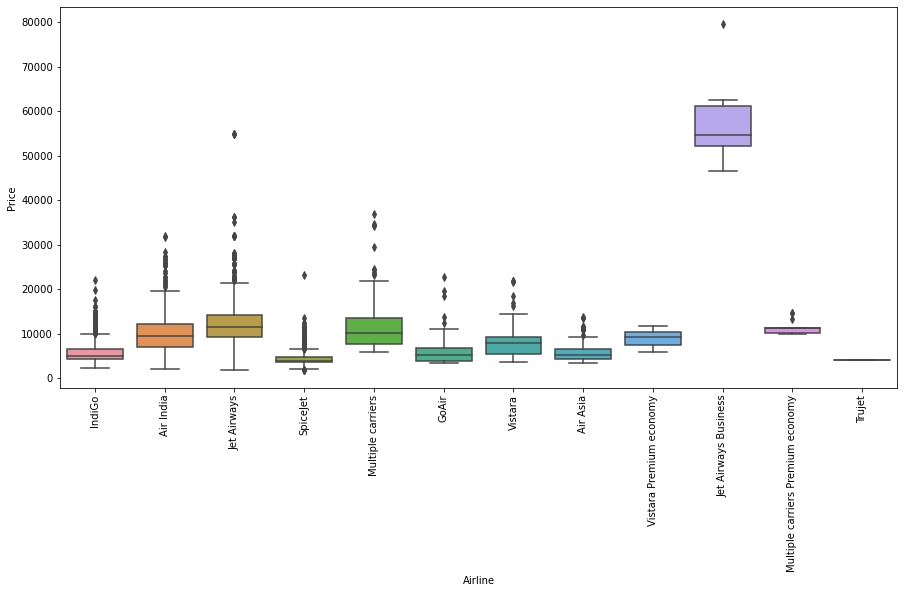

In [75]:
## This is a disdribution boxplot which shows the airline and price.

plt.figure(figsize=(15,7))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

# DATA PRE-PROCESSING: removing some of the un-necessary features['Additional info' Route','Duration_total_mins..]


In [77]:
## Focusing on 'Additional info' which will be Dropped. 

data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325


In [81]:
## This shows that at most of the instances they is a high count in 'No info' which proves that it's unnecessary.  

data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [82]:
## Additional_Info contains almost 80% 'No_info',so I can drop this column
## I can drop Route as well because Total_stops feature can represent the 'Route' which means I dont need it.
## I can drop Duration_total_mins as I have already extracted "Duration_hours" and "Duration_mins"

data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [85]:
## This shows that the selected coluwns have been dropped.

data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [86]:
## This further shows the columns have been dropped in the dataframe

data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25


# DATA PRE-PROCESSING: Separating categorical data & numerical data 

#### categorical data are those whose data-type is 'object'
#### Numerical data are those whose data-type is either int of float


In [88]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [89]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [90]:
## This shows all the categorial columns in the dataset

cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [91]:
## This shows all the Numerical  columns in the dataset

num_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

## DATA PRE-PROCESSING: Handling categorical Data

##### I will be using 2 basic Encoding Techniques to convert Categorical data into some numerical format
##### if data belongs to Nominal data (ie data is not in any order) -->> OneHotEncoder is used in this case
##### if data belongs to Ordinal data (ie data is in order ) -->>       LabelEncoder is used in this case


In [93]:
## applying one-hot encoding on 'Source' feature

In [94]:
## This shows all the unique Sources in the data.

data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [95]:
## The ML Model will not understand what this features mean so I apply an encoding.

data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [96]:
## when ever we have 'Banglore' it says 1 else it says 0

data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [97]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [98]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


# DATA PRE-PROCESSING: Performing Target Guided Mean Encoding

#### Target encoding is great for High-cardinality features: A feature with a large number of categories can be troublesome to encode: a one-hot encoding would generate too many features and alternatives,like a label encoding, might not be appropriate for that feature.


In [100]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [101]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [102]:
## dict1 stores each airline as a numerical from 0 to 11

dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [103]:
data['Airline']=data['Airline'].map(dict1)

In [104]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [114]:
## This dataframe is updated and shows the Airline column is now numerical

data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [106]:
## I will be focusing on 'New Delhi' and 'Delhi' which i will consider both as one/ the same...

data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [107]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [108]:
## This shows i have updated the airline and their is only one Delhi

data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [109]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [110]:
dict2={key:index for index,key in enumerate(dest,0)}

In [111]:
## dict2 stores each Destination as a numerical from 0 to 11

dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [112]:
data['Destination']=data['Destination'].map(dict2)

In [113]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [115]:
## This dataframe is updated and shows that Destination column is in a numerical format

data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [116]:
## This feature ('Total_Stops') also needs a manual encoding

data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [117]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [120]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [121]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [122]:
## This dataframe is updated and shows that Total Stops column is in a numerical format

data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


# DATA PRE-PROCESSING: Performing Outlier detection

#### Detection and removal of outliers in a dataset is a fundamental preprocessing task, without outlier detection/removal the analysis of the data can be misleading


In [124]:
## Using data visualisation tools to spot the Outliers

In [135]:
## The code beblow shows that there will be 3 sub-plots which are distribution, box, and histogram

def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

/Users/uthmanmaigari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/uthmanmaigari/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



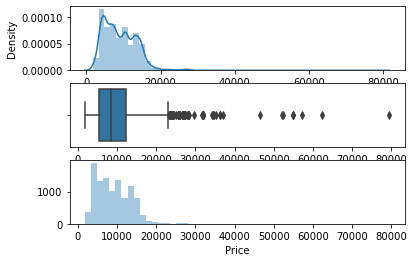

In [136]:
## This shows 3 plots and I can identify the outliers for 'Price'

plot(data,'Price')

#### Dealing with outliers. Statistical imputation , i.e impute it with mean , median or mode of data..
#### As there is some outliers in price feature,so we replace it with median.

In [137]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

/Users/uthmanmaigari/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/uthmanmaigari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/uthmanmaigari/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hist

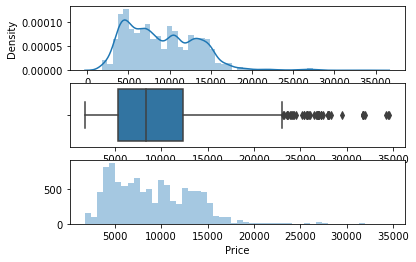

In [138]:
## once we deal with the outlier the data becomes less skewed

plot(data,'Price')

In [ ]:
## I will be dropping 'Source' and 'Duration' column 

In [139]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [140]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [276]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'journey_day',
       'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [141]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [142]:
## As shown below this is a datatype of all the feature in the updated dataset 
## which contains either float or integers. because this is what a ML algorithm needs

data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

# PERFORMING A FEATURE SELECTION 


In [144]:
from sklearn.feature_selection import mutual_info_regression

In [145]:
## I need an independent feature and dependent feature. 
## The 'Price' is my dependant (y) feature because it is reliant on the other features in the data.
## Hence the rest are independent (X) feature because they're not reliant on anything.

In [146]:
## The independant feature will be stored in 'x' while dependant will be stored in 'y'

In [147]:
X=data.drop(['Price'],axis=1)

In [148]:
y=data['Price']

In [149]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int64
Duration_mins          int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [151]:
## This shows all the mutual info regression Ill be getting

mutual_info_regression(X,y)

array([0.97769957, 1.00643463, 0.79256914, 0.18936692, 0.23257204,
       0.34034511, 0.25306132, 0.40479393, 0.34055364, 0.46188285,
       0.33637078, 0.37883112, 0.45315163, 0.520379  , 0.14153736,
       0.20897449])

In [152]:
## I have stored the mutual info regression in a pandas dataframe structure..

imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

In [153]:
## This are all the importance values with respect to each of their features.
## 'Destination' has the promising score..

imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.010642
Airline,0.985671
Total_Stops,0.796401
Source_Delhi,0.513507
Duration_hours,0.466363
Source_Kolkata,0.454341
Arrival_Time_hour,0.398595
Source_Banglore,0.387523
Duration_mins,0.347905
Arrival_Time_minute,0.347512


## BUILDING AN ML MODEL


In [155]:
from sklearn.model_selection import train_test_split

In [156]:
## Train test split is a model validation procedure that allows you to simulate how a model would.... 
## .....perform on new/unseen data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# BUILDING A RANDOM FOREST MODEL


In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
ml_model=RandomForestRegressor()

In [160]:
model=ml_model.fit(X_train,y_train)

In [161]:
y_pred=model.predict(X_test)

In [162]:
## This shows all the pridictions I end up getting.

y_pred

array([16723.03,  6447.62,  8872.98, ...,  3482.32,  6274.14,  7118.83])

In [163]:
y_pred.shape

(2671,)

In [164]:
len(X_test)

2671

In [188]:
forest= (model)
forest.predict(X_test)

array([16723.03,  6447.62,  8872.98, ...,  3482.32,  6274.14,  7118.83])

In [ ]:
## Defining my own Evaluation Metric 


In [186]:
## MAPE measures the average magnitude of error produced by a model, or how far off predictions are on average.

def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100


In [187]:
mape(y_test,forest.predict(X_test))

13.209839963739245

# Automating My ML Pipeline


In [246]:
def predict(ml_model):
    
    from sklearn import metrics
    
    print('Model is: {}'.format(ml_model))
    model=ml_model.fit(X_train,y_train)
    print('\n')
    
    print('Training_Accuracy_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    
    sns.distplot(y_test-y_prediction)
    

Model is: RandomForestRegressor()


Training_Accuracy_score: 0.9519794499765041
Predictions are : [16728.49  6393.05  8771.28 ...  3529.56  6241.19  6975.3 ]


r2_score: 0.8061699847279256
MSE :  3773405.140460956
MAE :  1186.5471133711021
RMSE :  1942.5254542633297
MAPE :  13.286563186944422


/Users/uthmanmaigari/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



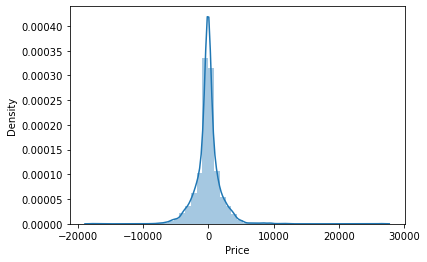

In [247]:
predict(RandomForestRegressor())

# BUILD/AUTOMATE MY LINEAR REGRESSION MODEL


In [249]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression


In [279]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    
    print('\n')
    print("Training Accuracy score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    
    print('\n')
    
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))    
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
    print('MAPE : ', mape(y_test,predictions))
     
    sns.distplot(y_test-predictions)  

Model is: LinearRegression()


Training Accuracy score: 0.5794483128817276
Predictions are: [12816.72571495  8820.27264273  8909.99897771 ...  4190.62345641
  9411.25977293  8261.70381625]


r2 score is: 0.555713367195872
MAE:2061.784107595206
MSE:8649194.304132724
RMSE:2940.951258374189
MAPE :  24.94861105877553


/Users/uthmanmaigari/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



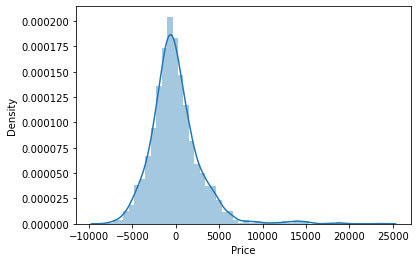

In [280]:
predict(LinearRegression())

# Hyperparameter Optimization:  To improve the ML model


In [197]:
## RandomizedSearchCV is a fast way to Hypertune model

from sklearn.model_selection import RandomizedSearchCV

In [198]:
### initialise the estimator

reg_rf=RandomForestRegressor()

In [199]:
## This returns an array that are equally spaced

np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [200]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [201]:
# Create the grid or hyper-parameter space

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split  
}

In [202]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [203]:
 rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [204]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [205]:
### to get your best model..
### This are typically parameters for my random forest model considering this use case

rf_Random.best_params_

{'n_estimators': 1120,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 21}

In [218]:
pred2=rf_Random.predict(X_test)

In [219]:
from sklearn import metrics

In [282]:
## This shows the accuracy has greatly improved with the error parameters declining....
## .....after the hypertuning is done. 

print('Model is: {}'.format(ml_model))
model=ml_model.fit(X_train,y_train)
print('\n')
    
print('Training_Accuracy_score: {}'.format(model.score(X_train,y_train)))
y_prediction=model.predict(X_test)
print('Predictions are : {}'.format(y_prediction))
print('\n')
    
print('r2_score: ', metrics.r2_score(y_test,pred2))
print('MSE : ', metrics.mean_squared_error(y_test,pred2))
print('MAE : ', metrics.mean_absolute_error(y_test,pred2))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,pred2)))
print('MAPE : ', mape(y_test,pred2))
 

Model is: RandomForestRegressor()


Training_Accuracy_score: 0.9516275830922576
Predictions are : [16712.04  6343.8   8788.78 ...  3496.04  6271.1   7070.78]


r2_score:  0.8283998807085746
MSE :  3340642.4249055255
MAE :  1152.027121877014
RMSE :  1827.7424394332822
MAPE :  12.909939018229052
